## Problem Statement

**To predict the price of used car given the data collected from various sources.
To build a model that can assign a price for a vehicle by evaluating car features and other variables which will affect the price of the used car.**

**Independent Variable:**
* Transmission
* Owner Type
* Mileage
* Engine
* Years
* Kilometers Driven
* Fuel Type
* New Price
* Seats
* Location 
<br>

**Dependent Variable:**
* Price

***

<hr>

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
import sklearn.ensemble as ensemble

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler

<hr>

***

## Importing dataset
We are using a dataset from kaggle to build the model. The dataset contains various features that can be used to predict prices of used cars.

In [2]:
usedcars = pd.read_csv("train-data.csv")

In [3]:
usedcars.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


***

<hr>

## About Data
Every variable in the dataset is described in following table.

<font size="10" face="Calibri">
<table style="width:80%">
<tr>
    <th width="7%">S.N</th>
    <th width="15%">Feature</th>
    <th width="20%" style="text-align:center">Type of Data</th>
    <th width="40%" style="text-align:left">Description</th>
    </tr>
    <tr>
        <th>1</th>
        <td>Name</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The brand and model of the car</td>
        </tr>
    <tr>
        <th>2</th>
        <td>Location</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The location in which the car is being sold or is available for purchase</td>
        </tr>
    <tr>
        <th>3</th>
        <td>Year</td>
        <td style="text-align:center">Numerical -Interval</td>
        <td style="text-align:left">The year or edition of the model</td>
        </tr>
    <tr>
        <th>4</th>
        <td>Kilometers_Driven</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The total kilometres driven in the car by the previous owner(s) in KM</td>
        </tr>
    <tr>
        <th>5</th>
        <td>Fuel_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of fuel used by the car</td>
        </tr>
    <tr>
        <th>6</th>
        <td>Transmission</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">The type of transmission used by the car</td>
        </tr>
    <tr>
        <th>7</th>
        <td>Owner_Type</td>
        <td style="text-align:center">Categorical -Nominal</td>
        <td style="text-align:left">Whether the ownership is Firsthand, Second hand or other</td>
        </tr>
    <tr>
        <th>8</th>
        <td>Mileage</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The standard mileage offered by the car company in kmpl or km/kg</td>
        </tr>
    <tr>
        <th>9</th>
        <td>Engine</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The displacement volume of the engine in CC</td>
        </tr>
    <tr>
        <th>10</th>
        <td>Power</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The maximum power of the engine in bhp</td>
        </tr>
    <tr>
        <th>11</th>
        <td>Seats</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The number of seats in the car</td>
        </tr>
    <tr>
        <th>12</th>
        <td>New_Price</td>
        <td style="text-align:center">Numerical -Ratio</td>
        <td style="text-align:left">The price of a new car of the same model</td>
        </tr>
    <tr>
        <th>13</th>
        <td>Price</td>
        <td style="text-align:center">Numeriical -Ratio</td>
        <td style="text-align:left">The price of the used car in INR Lakhs</td>
    </tr>
</table>

In [4]:
usedcars.shape

(6019, 14)

In [5]:
print("Used Cars Dataset: ")
print("Number of Rows: ", usedcars.shape[0])
print("Number of columns: ", usedcars.shape[1])

Used Cars Dataset: 
Number of Rows:  6019
Number of columns:  14


In [6]:
usedcars.describe(include = "all")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,63.71 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


**Insights from Summary**
<br>
- Dataset has 6019 observations and 14 variables.
<br>
- New column can be created as "Model_Age" which can be derived from the variable "Year".
<br>
- The variables "Mileage", "Engine" and "Power" have numerical values followed by unit used for measurement.We have to remove the units from each value.
<br>
- The column "Unnamed: 0" variable should be removed as it is giving indexe for an observation.
<br>
- There are lot of unique values in the column "Name".So, we have to find a way so that we can use this variable in our model.
<br>
- The varibale "New_Price" has lot of missing values.
<br>
- The minimum value of variable "Seats" is 0. 
<br>
- The columns "Mileage", "Engine", "Power" and "Seats" has missing values.

In [7]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


- The datatype of the variables "Mileage", "Engine", "Power" is object type, it should be converted into float.

In [8]:
#Checking for Null values
usedcars.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

- There are large number of outliers in variable "New_Price".
<br>
- We can replace these null values with appropriate values using suitable imputation strategy.

In [9]:
#Number of unique values for each variable
usedcars.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [ ]:
#list(usedcars["Name"].unique())

- The variable name contains company name followed by model name and other information. Because of this, the number of unique values in this variable is too large. To use this variable we can split the name into two different variables namely Company_name and Model_name.

In [10]:
usedcars["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
usedcars["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [12]:
usedcars["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [13]:
usedcars["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
usedcars["Owner_Type"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
#usedcars["Mileage"].unique()

- The variable "Mileage" has two units we have to convert the data such that this variable will have single unit. And the unit is  given after each value, it should be removed.

In [15]:
kmkg = 0
kmpl = 0
for i in usedcars.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print("The number of rows with unit km/kg : ", kmkg)
print("The number of rows with unit kmpl : ", kmpl)

The number of rows with unit km/kg :  66
The number of rows with unit kmpl :  5951


In [16]:
usedcars[usedcars["Fuel_Type"].isin(["CNG","LPG"])]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.70
5902,5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.25
5935,5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.10


- The unit for mileage is km/kg is for the Fuel_Type LPG and CNG.
So, we will be converting the values with unit km/kg to kmpl by following conversion factors.

1 litre of CNG ~ 0.18 kg
<br>

1 litre of LPG ~ 0.55 kg

In [ ]:
#usedcars["Engine"].unique()

- The unit is given in after each value, it should be removed.

In [ ]:
#usedcars["Power"].unique()

In [17]:
usedcars[usedcars["Power"] == "null bhp"]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.20
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,NaN,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,NaN,1.70


- The unit given after ecah value should be removed.
<br>
- The unique values also contain a value "null bhp", this can be replaced with Nan value and can be treated in missing value imputation

In [18]:
np.array(usedcars["Seats"].unique())

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

<hr>

- We van remove variable "Unnamed: 0" as it is giving the index of the each row and not adding any useful information.
<br>

- The variable New_Price has around 5195 null values that is 86.31% of the data is missing and that's why we will be removing this variable as well.

<hr>

<hr>

## Data Cleaning

In [19]:
#Checking for duplicate values
usedcars.duplicated().sum()

0

- There are no duplicate observations.

In [20]:
#Dropping the variables "Unnamed: 0", "New_Price"
usedcars = usedcars.drop(columns = ["Unnamed: 0", "New_Price"])

In [21]:
# Splitting the variable Name.
# Two new columns are added namely Company_Name and Model-Name.
# Company_Name : The name of the brand of the cae.
# Model_Name: The model of the car.

usedcars["Company_Name"] = usedcars["Name"].str.split(" ", n = 1, expand = True)[0]
usedcars["Model_Name"] = usedcars["Name"].str.split(" ", n = 2, expand = True)[1]

#Splitting the mileage value from the unit of the mileage.
usedcars["Mileage"] = usedcars["Mileage"].str.split(" ", n = 1, expand = True)[0]

#Splitting the value of engine volume from the unit of the mileage.
usedcars["Engine"] = usedcars["Engine"].str.split(" ", n = 1, expand = True)[0]

#Splitting the velue of power from the unit of the mileage.
usedcars["Power"] = usedcars["Power"].str.split(" ", n = 1, expand = True)[0]

In [22]:
#Checking the unique values of company names in data.
usedcars.Company_Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

- The Company_Name ISUZU is repeated in unique values because of the different cases used, it should be removed.

In [23]:
usedcars.loc[usedcars.Company_Name == "Isuzu", "Company_Name"] = "ISUZU"

In [24]:
#Checking the unique values of model names in data.
usedcars.Model_Name.unique()

array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
       'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
       'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
       'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
       'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
       'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
       'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport',
       'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B',
       'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb',
       'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
       'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
       'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
       'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
       'Celerio', 'Sumo', 'Accord', '6', 'Manza', 'Spark', 'Clubman'

In [25]:
usedcars.Model_Name.nunique()

212

- There are 212 unique values in Model_Name.

In [26]:
#Replacing the values "null" in the power variable to nan values.
usedcars["Power"].replace(to_replace = "null", value = np.nan, inplace = True)

In [27]:
#Changing the data type of varibles Mileage, Engine and Power.

usedcars["Mileage"] = pd.to_numeric(usedcars["Mileage"], errors = "coerce")
usedcars["Engine"] = pd.to_numeric(usedcars["Engine"], errors = "coerce")
usedcars["Power"] = pd.to_numeric(usedcars["Power"], errors = "coerce")

In [28]:
#Converting the data in variable "Fuel_Type" so that it will have same unit of measurement.

n=0
for i in usedcars['Fuel_Type']:
    if i == 'CNG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
    elif i == 'LPG':
        usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81
    n = n+1

<ipython-input-28-4eb483c1b5bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*5.55
<ipython-input-28-4eb483c1b5bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedcars['Mileage'][n] = usedcars['Mileage'][n]*1.81


In [29]:
#New column is added. It gives the age of the model in year 2020.

usedcars["Model_Age"] = usedcars["Year"].apply(lambda x : 2020 - x)

<hr>

<hr>

## Outlier Analysis and treatment

In [30]:
#Checking for extreme values.
usedcars.describe(include = "all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000,6019,6019,6019.000000
unique,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,30,212,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,Maruti,Swift,NaN
freq,49,790,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,NaN,1211,353,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,19.237426,1621.276450,113.253050,5.278735,9.479468,NaN,NaN,6.641801
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,13.045966,601.355233,53.874957,0.808840,11.187917,NaN,NaN,3.269742
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,0.440000,NaN,NaN,1.000000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.260000,1198.000000,75.000000,5.000000,3.500000,NaN,NaN,4.000000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.190000,1493.000000,97.700000,5.000000,5.640000,NaN,NaN,6.000000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1984.000000,138.100000,5.000000,9.950000,NaN,NaN,9.000000


- The variables "Mileage" and "Seats" have minimum values 0.Number of the seats and mileage of car cannot be 0. These 0 values can be replaced with Nan values and can be treated as null values.
<br>
- The minimum value in "Engine" is too small.
<br>
- Have to check varibles "Mileage", "Seats" again and also the variable "Kilometers_Driven" for outliers.

In [31]:
#Replacing th 0 values in mileage and seats to nan values.

usedcars["Mileage"].replace(to_replace = 0.0, value = np.nan, inplace = True)
usedcars["Seats"].replace(to_replace = 0.0, value = np.nan, inplace = True)

In [32]:
#Checking the observations which have engine capacity less than 300cc.
usedcars[usedcars.Engine < 600]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.0,Mahindra,E,4


In [33]:
usedcars[usedcars.Fuel_Type == "Electric"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra,E,4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius,9


In [ ]:
#The value of engine capacity for given car is 
#usedcars["Engine"].replace(to_replace = 72.0, value = np.nan, inplace = True)

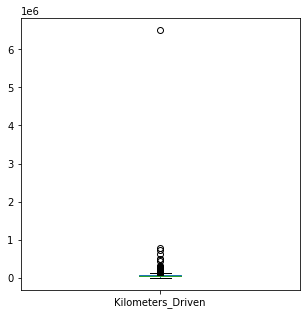

In [34]:
#Checking for outliers in variable "Kilometers_Drven".
usedcars["Kilometers_Driven"].plot.box(figsize=(5,5))
plt.show()

Outlier is present in the variable "Kilometers_Driven" it should be removed.

In [35]:
#Checking for outlier obsevations.
usedcars[usedcars.Kilometers_Driven > 1000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0,BMW,X5,3


In [36]:
#Dropping the outlier.
usedcars.drop(usedcars[usedcars.Kilometers_Driven > 1000000].index, inplace = True )

The deleting remaining outliers will not be ideal as they are valid observations.

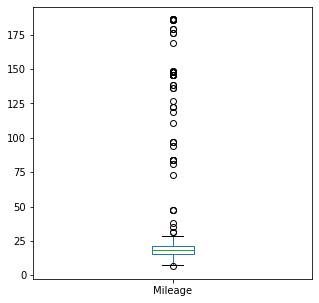

In [37]:
#Checking for the outliers in variable "Mileage".
usedcars["Mileage"].plot.box(figsize=(5,5))
plt.show()

In [38]:
#Outlier Observations.
usedcars[usedcars.Mileage > 30]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,147.630,998.0,58.16,5.0,1.75,Maruti,Wagon,10
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,38.191,814.0,55.20,5.0,2.35,Hyundai,EON,8
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,147.630,998.0,58.16,5.0,3.25,Maruti,Wagon,7
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,145.965,998.0,67.10,5.0,1.40,Maruti,Zen,12
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,83.805,1196.0,73.00,5.0,4.70,Maruti,Eeco,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,97.125,1373.0,80.46,7.0,8.25,Maruti,Ertiga,3
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,147.630,998.0,58.16,5.0,3.70,Maruti,Wagon,5
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,145.410,998.0,58.20,5.0,2.25,Maruti,Wagon,8
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,179.043,998.0,58.20,4.0,3.10,Maruti,Alto,5


The extreme values in "Mileage" can be contributed to the Fuel_Type of that particular type. Deleting these values will not be ideal.

<hr>

<hr>

## Missing value Imputation

In [39]:
usedcars.describe(include = "all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
count,6018,6018,6018.000000,6018.000000,6018,6018,6018,5948.000000,5982.000000,5875.000000,5975.000000,6018.000000,6018,6018,6018.000000
unique,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,30,212,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,Maruti,Swift,NaN
freq,49,790,NaN,NaN,3204,4299,4928,NaN,NaN,NaN,NaN,NaN,1211,353,NaN
mean,NaN,NaN,2013.357594,57668.047690,NaN,NaN,NaN,19.457906,1621.047141,113.228412,5.279665,9.470243,NaN,NaN,6.642406
std,NaN,NaN,3.269677,37878.783175,NaN,NaN,NaN,12.957234,601.143848,53.846427,0.806078,11.165926,NaN,NaN,3.269677
min,NaN,NaN,1998.000000,171.000000,NaN,NaN,NaN,6.400000,72.000000,34.200000,2.000000,0.440000,NaN,NaN,1.000000
25%,NaN,NaN,2011.000000,34000.000000,NaN,NaN,NaN,15.300000,1198.000000,75.000000,5.000000,3.500000,NaN,NaN,4.000000
50%,NaN,NaN,2014.000000,53000.000000,NaN,NaN,NaN,18.240000,1493.000000,97.700000,5.000000,5.640000,NaN,NaN,6.000000
75%,NaN,NaN,2016.000000,73000.000000,NaN,NaN,NaN,21.100000,1984.000000,138.100000,5.000000,9.950000,NaN,NaN,9.000000


In [40]:
usedcars.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
Price                  0
Company_Name           0
Model_Name             0
Model_Age              0
dtype: int64

Variables "Mileage", "Engine", "Power", "Seats" have missing values.

In [41]:
print("Total number of observations which have null values: ",70+36+143+43)

Total number of observations which have null values:  292


### 1. Missing value imputation for variable "Engine".

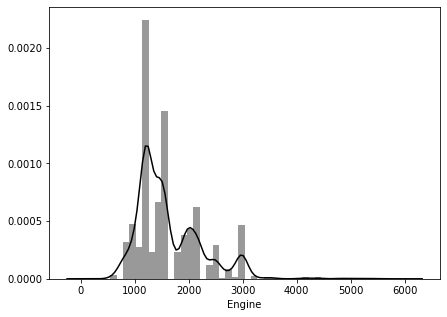

In [42]:
plt.figure(figsize=(7, 5))
sns.distplot(usedcars["Engine"],color="black");
plt.show()

There are 36 missing values in variable "Engine". The variable gives the engine capacity for the car specified by the manufacturer. Thus, these values are specific to the name of the car which is given in the dataset. We can impute these values by grouping the observations by names of the car and getting mean or median of the grouped engine capacity values. We can use either of the mean or median to impute these values.

In [43]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Name"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

31

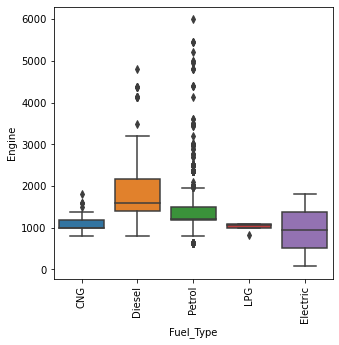

In [44]:
plt.figure(figsize=(5, 5))
fig = sns.boxplot(x = "Fuel_Type", y="Engine", data=usedcars)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#usedcars[(usedcars.Company_Name == "Honda") & (usedcars.Model_Name == "City")]

The engine capacity varies with type of transmission and fuel type. So, in next step imputation is done using gouping the observtions by "Company_Name", "Model_Name", "Transmission".

In [45]:
usedcars["Engine"] = usedcars["Engine"].fillna(usedcars.groupby(["Company_Name","Model_Name","Fuel_Type"])["Engine"].transform("median"))
usedcars.Engine.isnull().sum()

2

In [46]:
usedcars[usedcars.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,40.88,Land,Rover,12
4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,NaN,NaN,NaN,2.60,Fiat,Punto,9


Imputing engine capacities for above cars directly.

In [47]:
usedcars.at[1460,"Engine"] = 2993

In [48]:
usedcars.at[4446,"Engine"] = 1461

### 2. Missing value imputation for variable "Mileage".

There are 70 missing values for this variable. The imputation is done in the same way as it is done above.

In [ ]:
#usedcars[usedcars.Mileage.isnull()]

In [49]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Name"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

67

In [ ]:
#usedcars[usedcars.Mileage.isnull()]

In [ ]:
#usedcars[(usedcars.Company_Name == "Land") & (usedcars.Model_Name == "Rover")]

In [50]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Model_Name","Fuel_Type","Transmission","Engine"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

20

In [51]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

14

In [52]:
usedcars["Mileage"] = usedcars["Mileage"].fillna(usedcars.groupby(["Company_Name","Fuel_Type","Transmission"])["Mileage"].transform("median"))
usedcars.Mileage.isnull().sum()

4

In [53]:
usedcars[usedcars.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart,Fortwo,12
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,2993.0,NaN,NaN,40.88,Land,Rover,12
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,1461.0,41.0,5.0,13.00,Mahindra,E,4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius,9


In [54]:
#Dropping the baservations with null values is variable mileage.
usedcars = usedcars.dropna(subset = ["Mileage"])

### 3. Missing value imputation for variable "Power".

In [ ]:
#usedcars[usedcars.Power.isnull()]

In [55]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Name"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

111

In [56]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Transmission","Fuel_Type","Engine"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

25

In [57]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine","Transmission"])["Power"].transform("median"))
usedcars.Power.isnull().sum()

24

In [58]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Model_Name","Engine"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

20

In [59]:
usedcars["Power"] = usedcars["Power"].fillna(usedcars.groupby(["Company_Name","Engine","Fuel_Type","Transmission"])["Power"].transform("median"))
usedcars["Power"].isnull().sum()

16

In [60]:
#Dropping the observations with null values.
usedcars = usedcars.dropna(subset = ["Power"])

### 4. Missing value imputation for variable "Seats".

The number of seats in a car are specific to a car so we will be grouping the number of seats using the variable "Name" and impute the null values with the median.

In [61]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Name"])["Seats"].transform("median"))
usedcars.Seats.isnull().sum()

34

Now remaining null values can be imputed by grouping the number of seats usinf variables "Company_Name" and "Model_Name" and will impute with median for each group formed.

In [62]:
usedcars["Seats"] = usedcars["Seats"].fillna(usedcars.groupby(["Company_Name","Model_Name"])["Seats"].transform("median"))
usedcars.Seats.isnull().sum()

3

In [63]:
usedcars[usedcars.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.50,Maruti,Estilo,12
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,2.50,Maruti,Estilo,10
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,64.0,NaN,1.75,Maruti,Estilo,12


The number of seats in above car is 5 which is taken from the internet and is imputed in each observation.

In [64]:
usedcars.at[2369,"Seats"] = 5
usedcars.at[3882,"Seats"] = 5
usedcars.at[5893,"Seats"] = 5

In [65]:
usedcars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company_Name         0
Model_Name           0
Model_Age            0
dtype: int64

All the missing values have been imputed.

In [66]:
usedcars.shape

(5998, 15)

In [67]:
print("Total number of observations dropped: ",6019 - usedcars.shape[0])
print("Percent of null values dropped: ", ((6019 - usedcars.shape[0])/6019)*100,"%")

Total number of observations dropped:  21
Percent of null values dropped:  0.34889516530985215 %


<hr>

<hr>

## Exploratory Data Analysis

In [68]:
usedcars.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company_Name', 'Model_Name', 'Model_Age'],
      dtype='object')

In [69]:
quant_var = [i for i in usedcars.columns if usedcars.dtypes[i] != 'object']

qual_var = [i for i in usedcars.columns if usedcars.dtypes[i] == 'object']

print("Quantitative Variables: ",quant_var)
print("Qualitative Variables: ",qual_var)

Quantitative Variables:  ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Model_Age']
Qualitative Variables:  ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Company_Name', 'Model_Name']


### A. Univariate Analysis

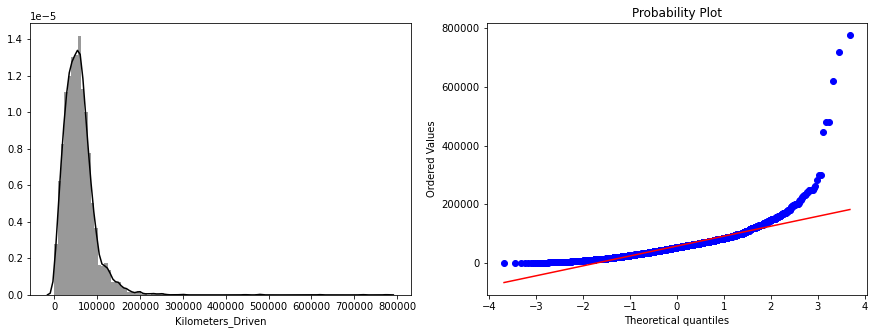

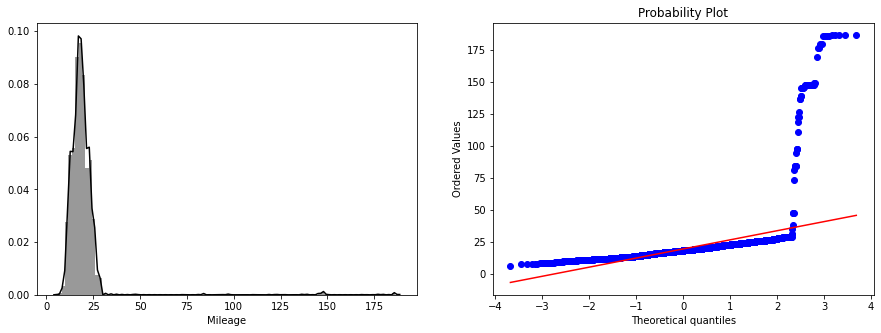

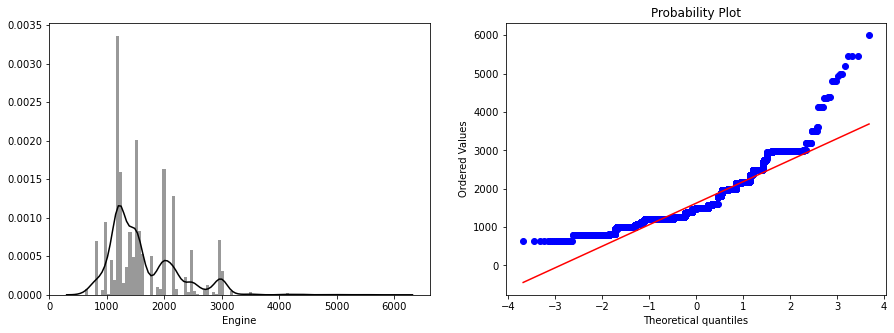

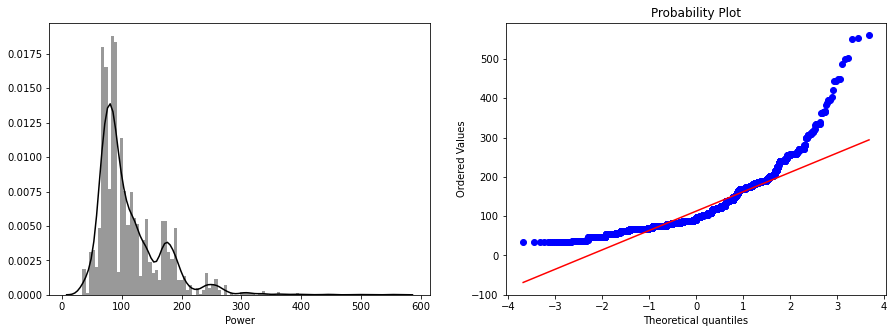

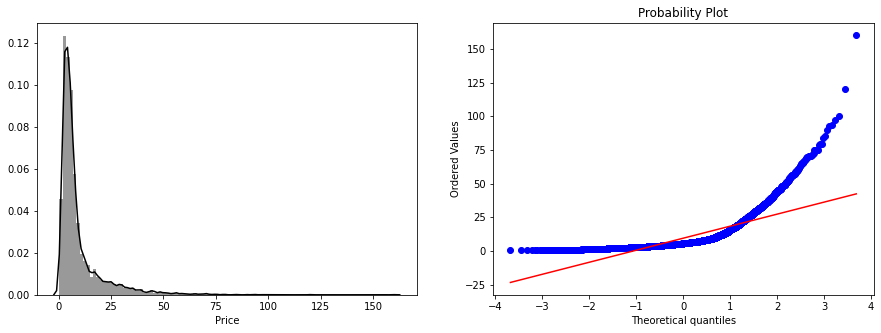

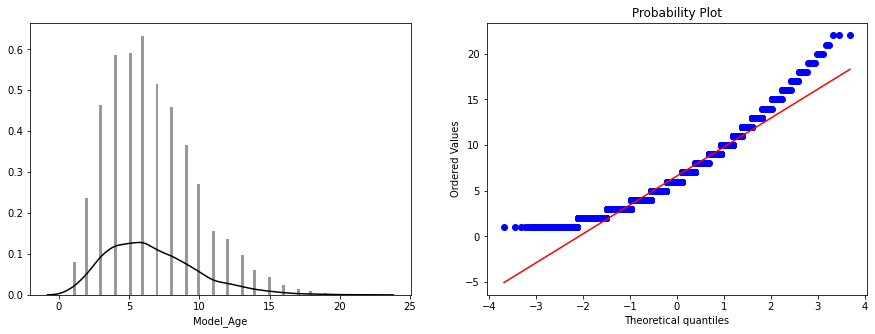

In [70]:
for i in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price','Model_Age']:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1,2,1)
    sns.distplot(usedcars[i],color="black", bins = 100);
    
    
    plt.subplot(1,2,2)
    stats.probplot(usedcars[i], dist = "norm", plot = plt)
    
    plt.show()

There are outliers in variables "Kilometers_Driven", "Mileage", "Engine", "Power" and "Price". The variable "Price", "Power", "Kilometers_Driven", "Model_Age" are right skewed.
<br>
The dependent variable "Price" is not normally distributed. The variable can be transformed to get a approximate normal distribution.This will make the relationship between independent and dependent variable more linear.(For Multiple Linear Regression Model)

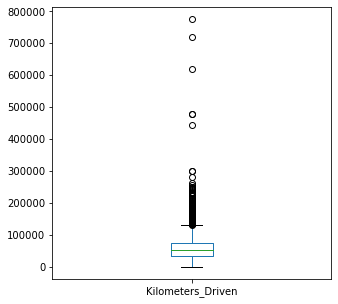

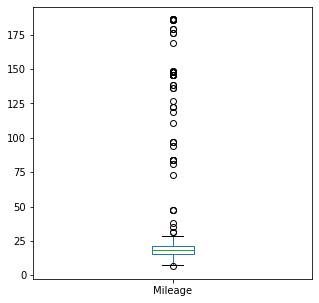

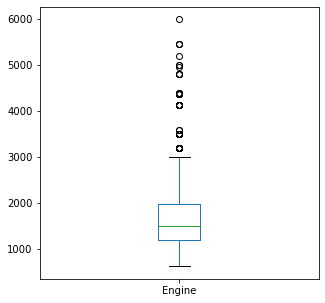

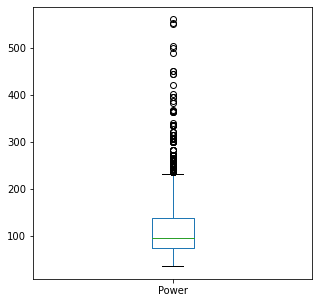

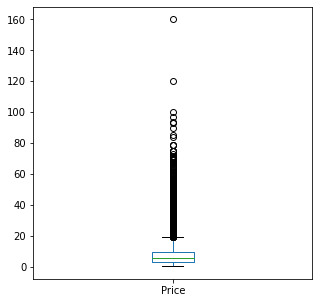

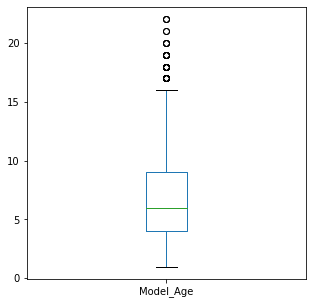

In [71]:
for i in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price','Model_Age']:
    usedcars[i].plot.box(figsize=(5,5))
    plt.show()

There are outliers in almost all of the numerical variables. Deleting these varibles will not be ideal as these are observations.

In [ ]:
#for i in ["Model_Age","Seats",'Location','Fuel_Type','Transmission','Owner_Type']:
    #plt.figure(figsize=(11, 4))
    #sns.countplot(x = i , data = usedcars)
    #plt.show()

In [ ]:
#for i in ['Company_Name']:
    #plt.figure(figsize=(30, 8))
    #sns.countplot(x = i , data = usedcars)
    #plt.show()

### B. Bivariate Analysis

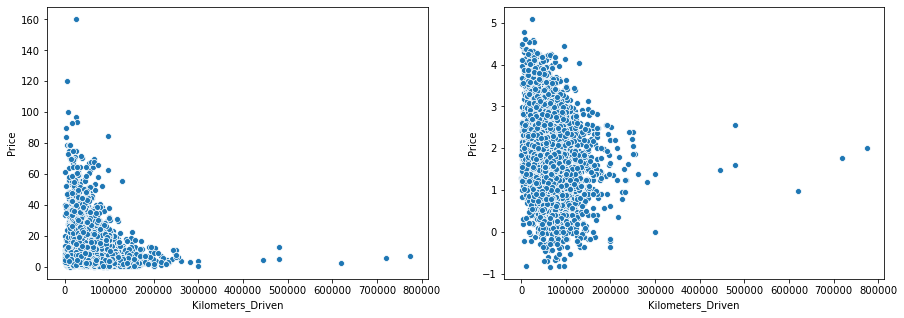

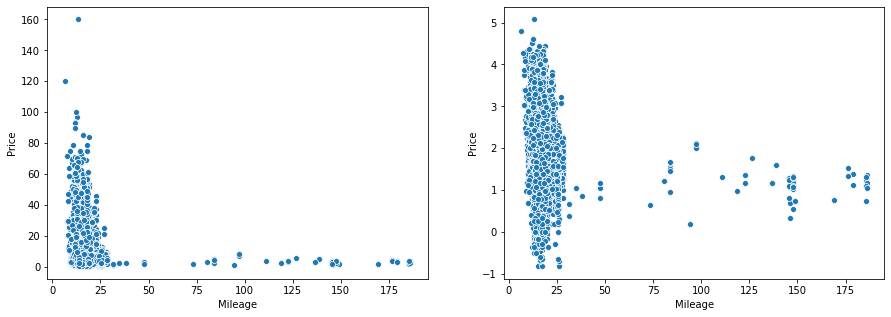

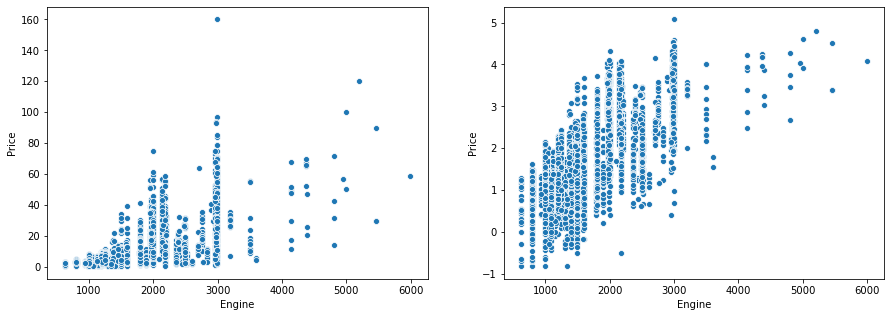

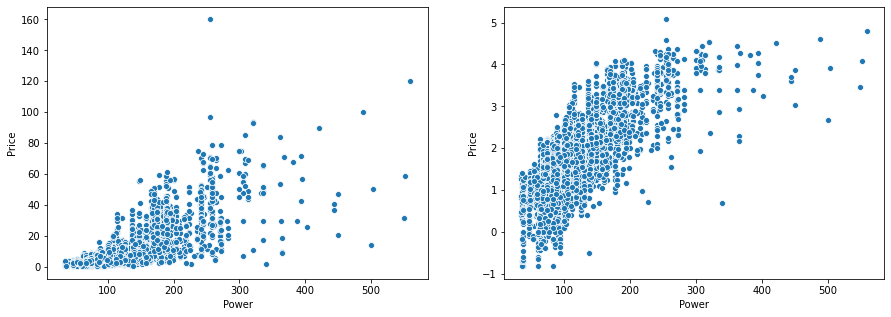

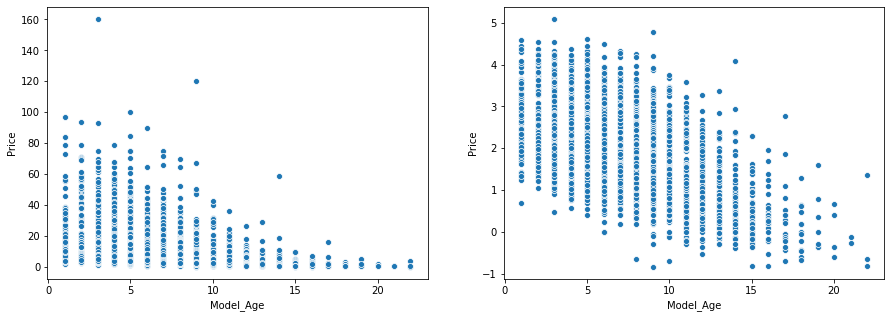

In [72]:
for i in ['Kilometers_Driven', 'Mileage', 'Engine', 'Power','Model_Age']:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1,2,1)
    sns.scatterplot(x = usedcars[i], y = usedcars["Price"]);
    
    
    plt.subplot(1,2,2)
    sns.scatterplot(x = usedcars[i], y = np.log(usedcars["Price"]))
    
    plt.show()

There is strong linearity between the dependent variable and the variables "Power" and "Engine".
<br>
The linearity in dependent variable and variables "Kilometers_Driven" and "Mileage" is not that strong.The price is inceasing for the constant values of kilometers driven and mileage. This can be resolved by transforming the dependent variable.(Linear Regression Model)
<br>
As the number of kilometers driven are increasing price is decreasing. There are some outliers also but they can be contributed to other factors such as company make, power etc.
<br>
After transformation there is no significant increase or decrease in the price with variation in mileage.
<br>
As the model age is increasing the price is decreasing.

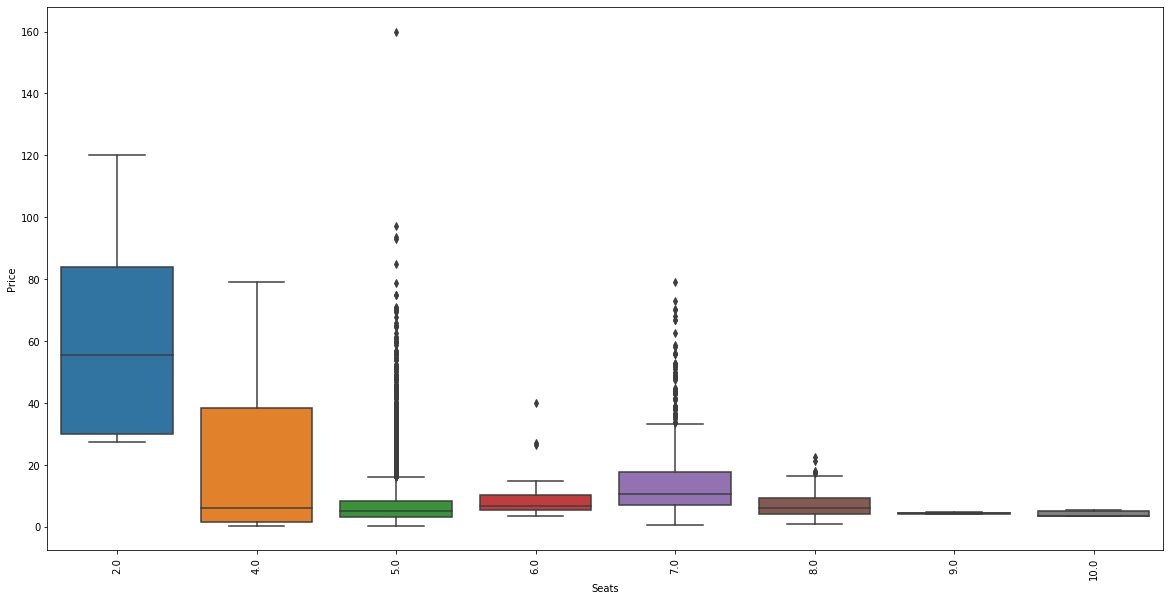

In [73]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Seats", y="Price", data=usedcars)
plt.xticks(rotation=90)
plt.show()

In [74]:
usedcars[usedcars.Seats == 2]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Name,Model_Age
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.00,Mercedes-Benz,SLC,3
557,Audi TT 2.0 TFSI,Delhi,2013,12100,Petrol,Automatic,First,9.90,1984.0,207.80,2.0,29.50,Audi,TT,7
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.54,Mercedes-Benz,SLK-Class,4
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.00,Mercedes-Benz,SLK-Class,5
1078,Porsche Boxster S tiptronic,Kolkata,2015,10512,Petrol,Automatic,First,8.60,2706.0,265.00,2.0,64.00,Porsche,Boxster,5
1288,Audi TT 2.0 TFSI,Kochi,2014,14262,Petrol,Automatic,First,9.90,1984.0,207.80,2.0,27.35,Audi,TT,6
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,83.96,Mercedes-Benz,SLC,1
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.00,2.0,90.00,Mercedes-Benz,SLK-Class,6
4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.10,5461.0,387.30,2.0,29.50,Mercedes-Benz,SL-Class,10
4893,BMW Z4 2009-2013 Roadster 2.5i,Kochi,2018,9952,Petrol,Automatic,First,10.37,2979.0,306.00,2.0,58.54,BMW,Z4,2


The cars with two seats have higher prices as compared to the others. The higher price canonot be contributed to the number of seats.Usually, luxurious cars have two seats which have higher prices.

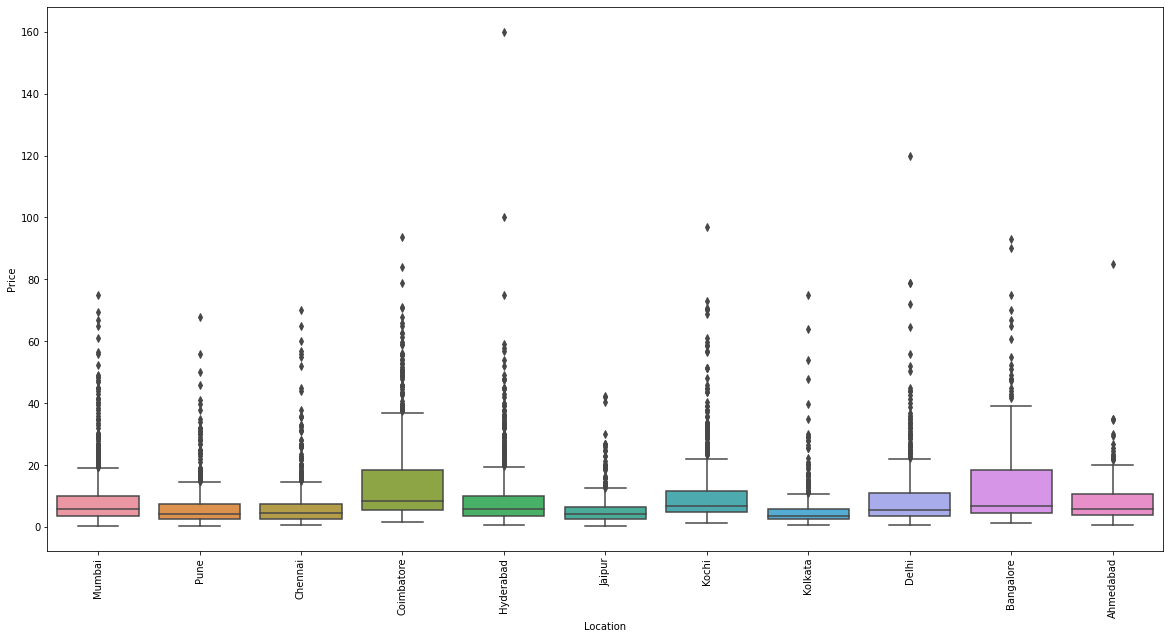

In [75]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x = "Location", y="Price", data=usedcars)
plt.xticks(rotation=90)
plt.show()

There is no much difference in variation of prices of car if locations are considered.

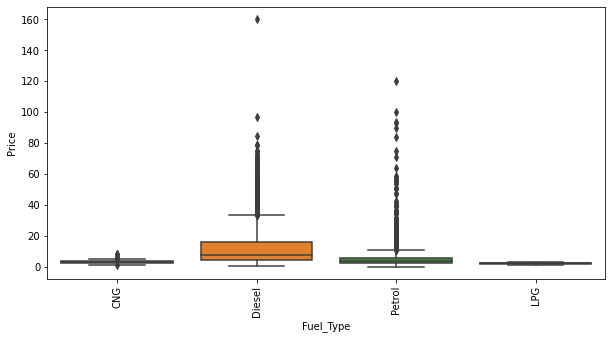

In [76]:
plt.figure(figsize=(10, 5))
fig = sns.boxplot(x = "Fuel_Type", y="Price", data=usedcars)
plt.xticks(rotation=90)
plt.show()

Diesel cars are expensive than petrol cars. 75 percent of prices for petrol cars are below 50 percent of the prices of Diesel cars.

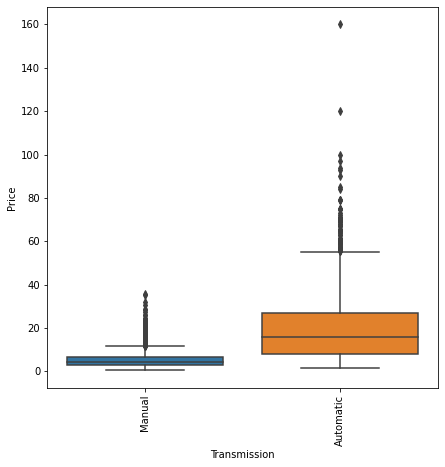

In [77]:
plt.figure(figsize=(7, 7))
fig = sns.boxplot(x = "Transmission", y="Price", data=usedcars)
plt.xticks(rotation=90)
plt.show()

The prices of the cars with manual transmission have less variability as compared to the prices of cars with automatic transmission. Also, cars with manual transmission have less prices than the automatic transmission.

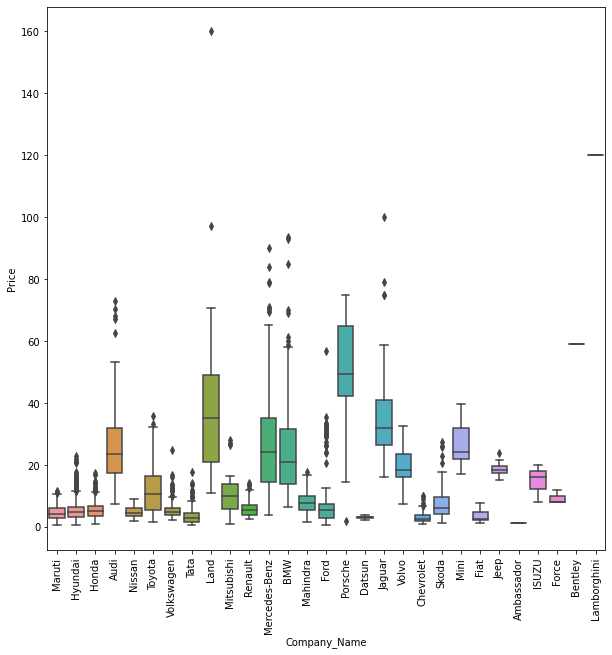

In [78]:
plt.figure(figsize=(10, 10))
fig = sns.boxplot(x = "Company_Name", y="Price", data=usedcars)
plt.xticks(rotation=90)
plt.show()

The luxury cars have more price variation.

### C. Multivariate Analysis

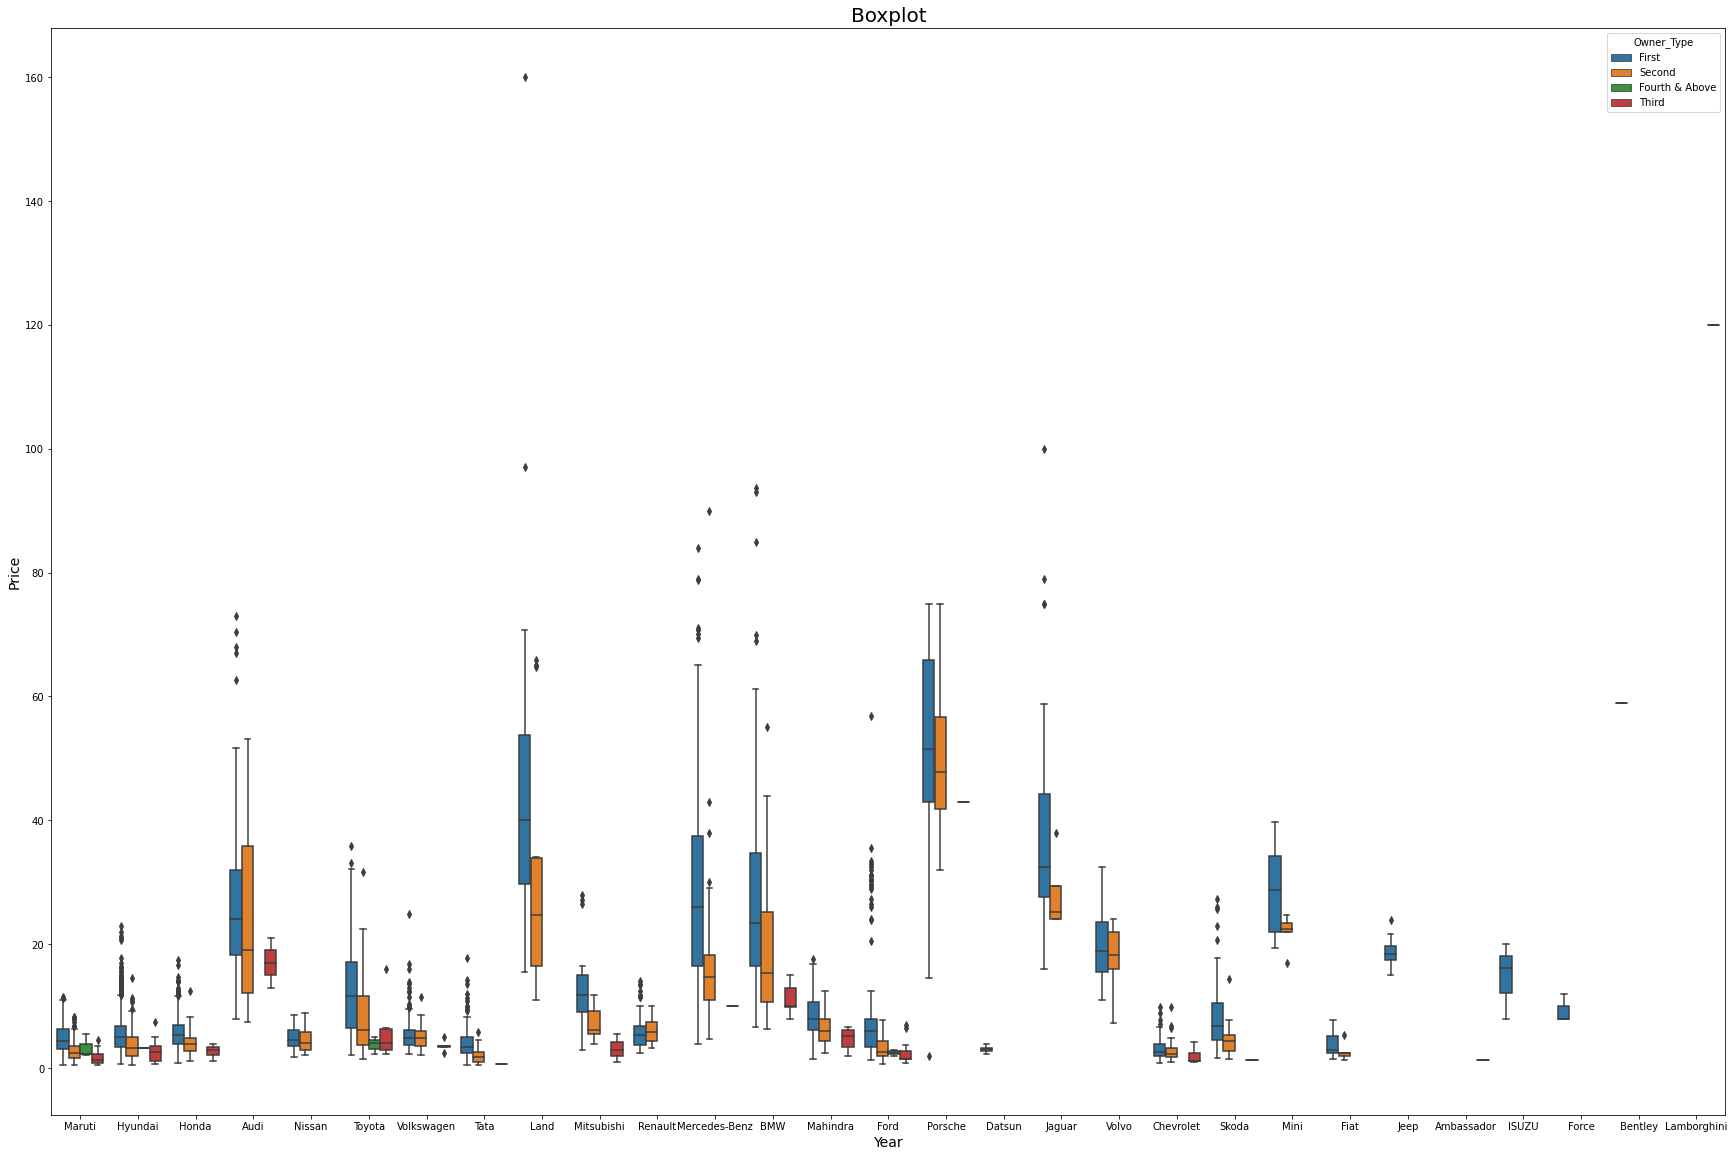

In [79]:
plt.figure(figsize=(30,20))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Owner_Type")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

The prices of cars have more spread and higher prices when the cars are first hand and second hand irrespective of the brand of the car.

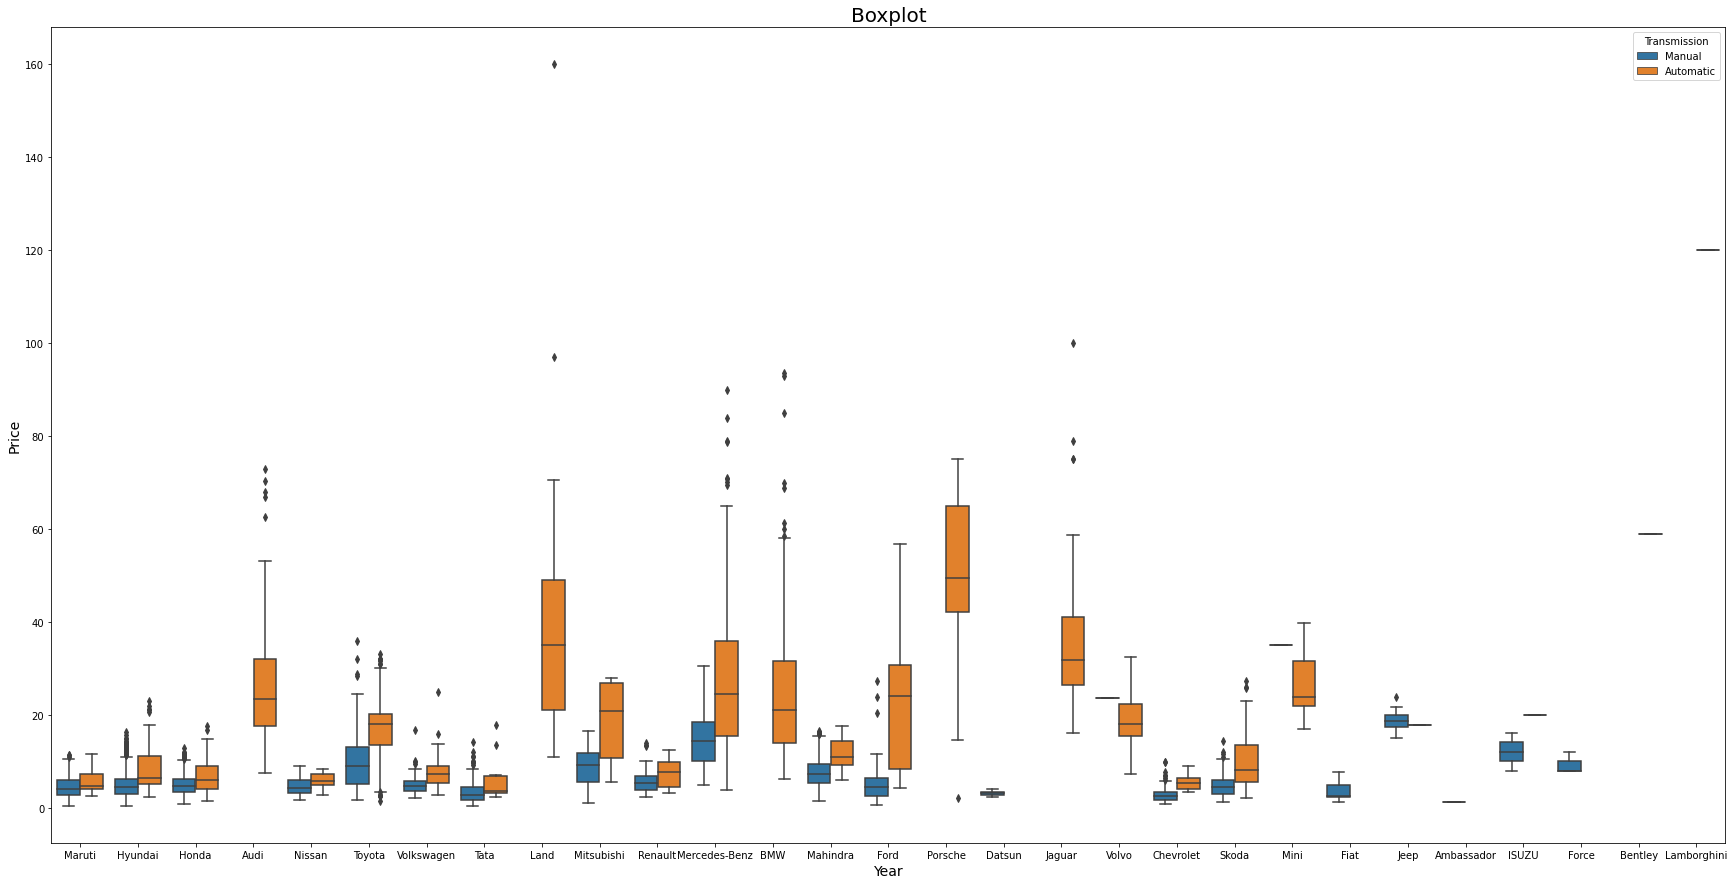

In [80]:
plt.figure(figsize=(30,15))
sns.boxplot(data=usedcars, x="Company_Name", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

Irrespective of the manufacturer of the car, prices of cars with automatic transmission have higher variation and higher prices compared to cars with manual transmission.

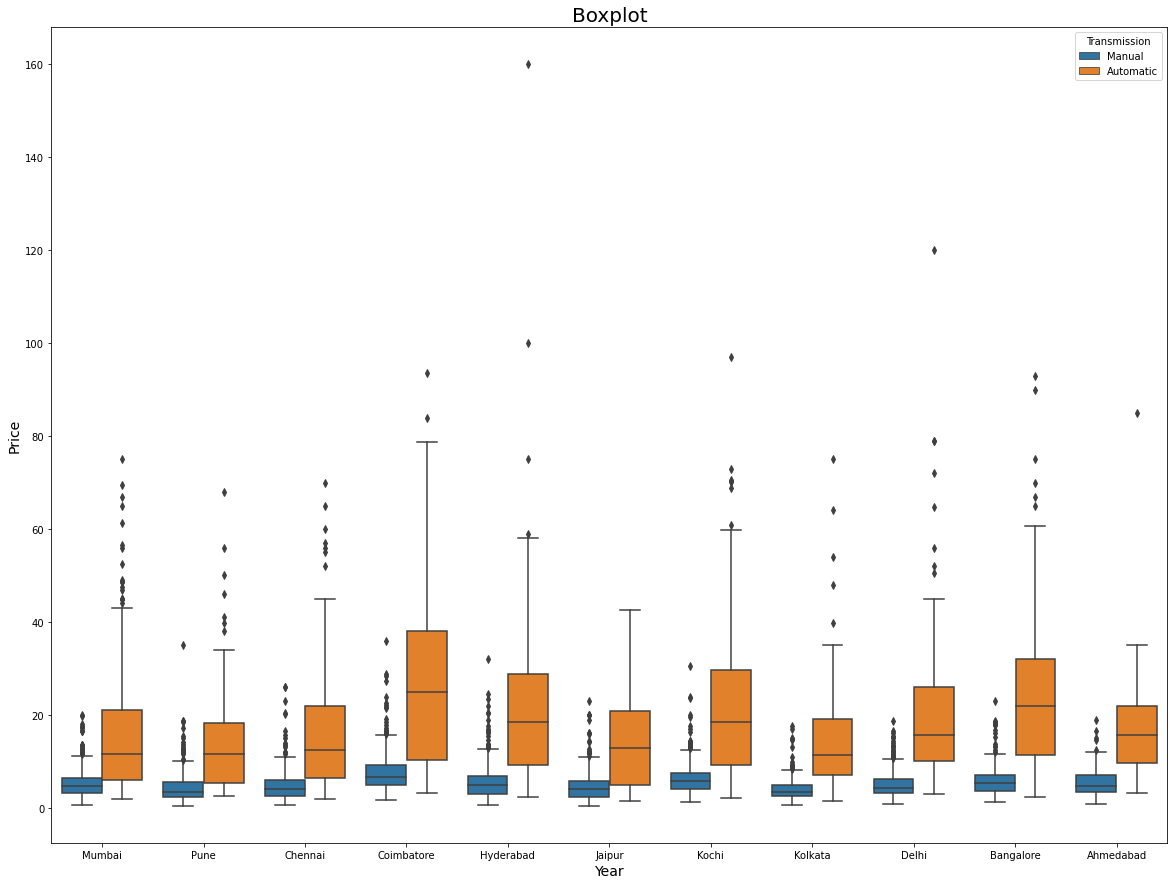

In [81]:
plt.figure(figsize=(20,15))
sns.boxplot(data=usedcars, x="Location", y="Price", hue="Transmission")
plt.xlabel("Year", size=14)
plt.ylabel("Price", size=14)
plt.title("Boxplot", size=20)
plt.show()

The median values for a particular transmission are approximately identical. There is no much difference in variability in prices of the car for different transmissions.

In [82]:
#Dropping the redundant variables.
usedcars = usedcars.drop(columns = ["Name"])
usedcars = usedcars.drop(columns = ["Location"])
usedcars = usedcars.drop(columns = ["Year"])
usedcars = usedcars.drop(columns = ["Model_Name"])

In [83]:
usedcars

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Age
0,72000,CNG,Manual,First,147.63,998.0,58.16,5.0,1.75,Maruti,10
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,5
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,9
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,8
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,7
...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,6
6015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,5
6016,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,8
6017,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,7


In [84]:
#Resetting the indexes.
usedcars.reset_index(drop = True)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Age
0,72000,CNG,Manual,First,147.63,998.0,58.16,5.0,1.75,Maruti,10
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,5
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,9
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,8
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,7
...,...,...,...,...,...,...,...,...,...,...,...
5993,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,6
5994,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,5
5995,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra,8
5996,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,7


<hr>

<hr>

## Categorical Data Encoding

The categorical variables must be converted into numerical variables.Otherwise we cannot use categorical varibles to fit the model.(Regression and KNN)
<br>
The Categorical variables are **['Fuel_Type', 'Transmission', 'Owner_Type', 'Company_Name']**
<br>

### 1. Dummy Encoding

The categorical variables "Fuel_Type", "Transmission" and "Owner_Type" have 4, 2,4 categories respectively. Dummy Encoding can be used here as the number of categories in variable are less and also it has advantages over label encoding.
Also, even the variable "Company_Name" has 28 unique values we will be using dummy encoding to see if there is change in accuracy of model because of the increased number of columns.

In [85]:
#Dummy Encoding
#Dropping the first columns from dummy variables to remove redundancy or else it there will be multicollinearity.

Fuel_Type = pd.get_dummies(usedcars["Fuel_Type"], drop_first = True)
Transmission = pd.get_dummies(usedcars["Transmission"], drop_first = True)
Owner_Type = pd.get_dummies(usedcars["Owner_Type"], drop_first = True)
Company_Name = pd.get_dummies(usedcars["Company_Name"], drop_first = True)

In [86]:
#Creating new dataframe usedcars_dummy by concatenating above dummy variables dataframes in earlier dataframe usedcars.
usedcars_dummy = pd.concat([usedcars,Transmission,Fuel_Type,Owner_Type,Company_Name],axis=1)

In [87]:
usedcars_dummy.head(1)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,72000,CNG,Manual,First,147.63,998.0,58.16,5.0,1.75,Maruti,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#Removing categorical columns
usedcars_dummy.drop(["Fuel_Type","Transmission","Owner_Type","Company_name"], inplace = True, axis = 1)

### 2. Dummy Encoding and Label Encoding

In Categorical variable "Company_Name" there are 28 unique values. If dummy encoding is used it will add 27 new columns to dataframe. If dummy encoding is done for all the categorical variables then number of coluns increased from 11 to 43.
In this step we will use label encoding for column "Company_Name" and rest of the variables will be dummy encoded.

In [93]:
#Creating new dataframe usedcars_dummy_lbl by concatenating above dummy variable dataframes in earlier dataframe usedcars.
usedcars_dummy_lbl = pd.concat([usedcars,Transmission,Fuel_Type,Owner_Type],axis=1)

In [94]:
#Removing categorical columns
usedcars_dummy_lbl.drop(["Fuel_Type","Transmission","Owner_Type"], inplace = True, axis = 1)

In [95]:
usedcars_dummy_lbl['Company_Name'].value_counts()

Maruti           1210
Hyundai          1100
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          270
BMW               266
Audi              235
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             90
Land               59
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            16
Jeep               15
Datsun             13
ISUZU               3
Force               3
Lamborghini         1
Bentley             1
Ambassador          1
Name: Company_Name, dtype: int64

In [96]:
mean_price_company = pd.DataFrame(usedcars_dummy_lbl.groupby("Company_Name")['Price'].mean())
mean_price_company = mean_price_company.sort_values(by=['Price'])
print(mean_price_company)

                    Price
Company_Name             
Ambassador       1.350000
Chevrolet        3.044463
Datsun           3.049231
Fiat             3.501600
Tata             3.562849
Maruti           4.520298
Nissan           4.754889
Volkswagen       5.307270
Hyundai          5.364673
Honda            5.411743
Renault          5.799034
Ford             6.889400
Skoda            7.559075
Mahindra         8.051074
Force            9.333333
Mitsubishi      11.058889
Toyota          11.577171
ISUZU           14.696667
Jeep            18.718667
Volvo           18.802857
BMW             25.093684
Audi            25.569787
Mercedes-Benz   26.809874
Mini            26.896923
Jaguar          37.632250
Land            39.232034
Porsche         49.204375
Bentley         59.000000
Lamborghini    120.000000


The compaies will be labelled according to the mean prices for particular company is dataset. The brand with higher mean prices will get higher number and brand with lower mean value will get lowest. Label Encoding will not increase the number of columns in a dataframe.

In [97]:
usedcars_dummy_lbl.replace({"Ambassador":1,"Datsun":2, "Chevrolet":3, "Fiat":4, "Tata":5, "Maruti":6, "Nissan":7, 
                            'Volkswagen':8, "Honda":9, "Hyundai":10, "Renault":11, "Ford":12, "Skoda":13, "Mahindra":14,
                            "Force":15, "Mitsubishi":16, "Toyota":17, "ISUZU":18, "Jeep":19, "Volvo":20, "BMW":21,
                            "Audi":22, "Mercedes-Benz":23, "Mini":24, "Jaguar":25, "Land":26, "Porsche":26,
                            "Bentley":27, "Lamborghini":28},inplace=True)

In [98]:
usedcars_dummy_lbl.head(1)

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Age,Manual,Diesel,LPG,Petrol,Fourth & Above,Second,Third
0,72000,147.63,998.0,58.16,5.0,1.75,6,10,1,0,0,0,0,0,0


### 3. Label Encoding

All the categorical variables will be label encoded by comparing the mean prices for categories in each variable.

In [100]:
usedcars_lbl = usedcars

In [102]:
usedcars_lbl["Fuel_Type"].value_counts()

Diesel    3201
Petrol    2731
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [103]:
mean_price_fuel = pd.DataFrame(usedcars_lbl.groupby("Fuel_Type")["Price"].mean())
mean_price_fuel = mean_price_fuel.sort_values(by=["Price"])
print(mean_price_fuel)

               Price
Fuel_Type           
LPG         2.487000
CNG         3.516786
Petrol      5.673306
Diesel     12.834064


In [104]:
usedcars_lbl.replace({"LPG":1,"CNG":2, "Petrol":3, "Diesel":4},inplace=True)

In [105]:
usedcars_lbl["Owner_Type"].value_counts()

First             4917
Second             961
Third              111
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [106]:
mean_price_owner = pd.DataFrame(usedcars_lbl.groupby("Owner_Type")["Price"].mean())
mean_price_owner = mean_price_owner.sort_values(by=["Price"])
print(mean_price_owner)

                   Price
Owner_Type              
Fourth & Above  3.280000
Third           5.081712
Second          7.641446
First           9.937041


In [107]:
usedcars_lbl.replace({"Fourth & Above":1,"Third":2, "Second":3, "First":4},inplace=True)

In [108]:
usedcars_lbl["Transmission"].value_counts()

Manual       4286
Automatic    1712
Name: Transmission, dtype: int64

In [109]:
mean_price_trans = pd.DataFrame(usedcars_lbl.groupby("Transmission")["Price"].mean())
mean_price_trans = mean_price_trans.sort_values(by=["Price"])
print(mean_price_trans)

                  Price
Transmission           
Manual         5.325740
Automatic     19.843067


In [110]:
usedcars_lbl.replace({"Manual":1,"Automatic":2},inplace=True)

In [111]:
usedcars_lbl.replace({"Ambassador":1,"Datsun":2, "Chevrolet":3, "Fiat":4, "Tata":5, "Maruti":6, "Nissan":7, 
                            'Volkswagen':8, "Honda":9, "Hyundai":10, "Renault":11, "Ford":12, "Skoda":13, "Mahindra":14,
                            "Force":15, "Mitsubishi":16, "Toyota":17, "ISUZU":18, "Jeep":19, "Volvo":20, "BMW":21,
                            "Audi":22, "Mercedes-Benz":23, "Mini":24, "Jaguar":25, "Land":26, "Porsche":26,
                            "Bentley":27, "Lamborghini":28},inplace=True)

In [112]:
usedcars_lbl.head(1)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company_Name,Model_Age
0,72000,2,1,4,147.63,998.0,58.16,5.0,1.75,6,10


<hr>

<hr>

## Correlation Matrix

### 1. For Dataset without categorical data encoding

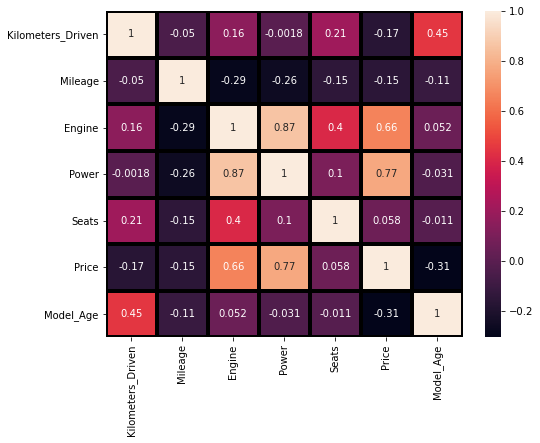

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(usedcars.corr(), annot=True, linewidths=3, linecolor='black')
plt.show()

The variable "Seat" has low correlation with target variable "Price".
<br>
"Power" and "Engine" are highly correlated.correlation > 0.87

### 2. For Dummy and Label Encoded data

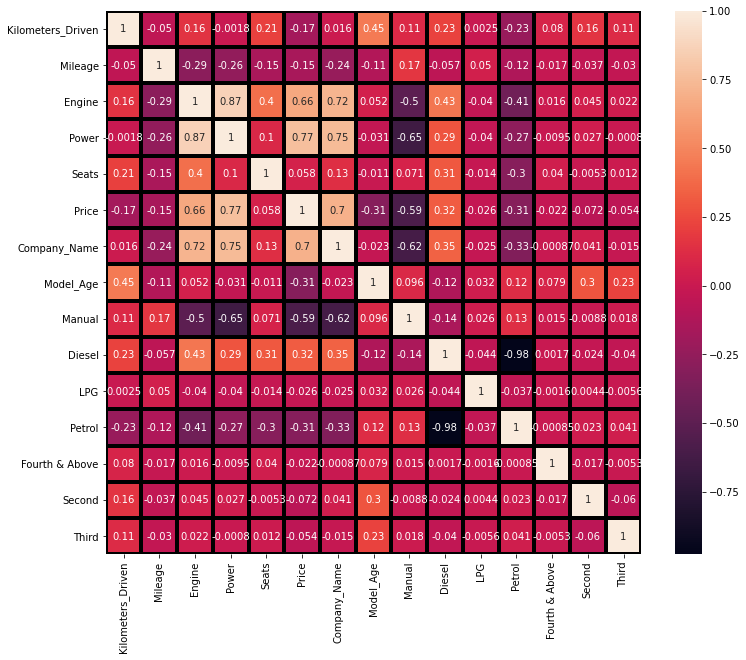

In [115]:
plt.figure(figsize=(12,10))
sns.heatmap(usedcars_dummy_lbl.corr(), annot=True, linewidths=3, linecolor='black')
plt.show()

### 3. For Label encoded data

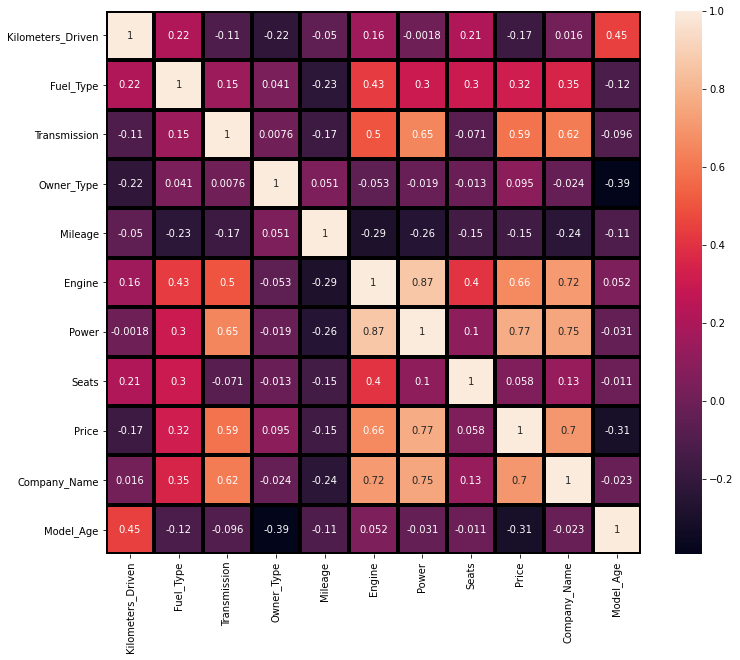

In [116]:
plt.figure(figsize=(12,10))
sns.heatmap(usedcars_lbl.corr(), annot=True, linewidths=3, linecolor='black')
plt.show()

<hr>

<hr>

## A. Linear Regression Model

In [122]:
lm = LinearRegression()

### A.1 WIth dummy encoded categorical data.

In [138]:
#log transforming the target variable.
usedcars_X_dummy = usedcars_dummy.drop(["Price"], axis = 1)
usedcars_y_dummy = np.log(usedcars_dummy["Price"])

In [139]:
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(usedcars_X_dummy, usedcars_y_dummy,
                                                                            test_size=0.3,random_state=100)

In [140]:
r2 = cross_val_score(lm, X_train_dummy, y_train_dummy, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.9091326351941973


In [141]:
model1 = lm.fit(X_train_dummy, y_train_dummy)
y1_pred= model1.predict(X_test_dummy)

print("Testing set: ",model1.score(X_test_dummy,y_test_dummy))

Testing set:  0.9170272023705863


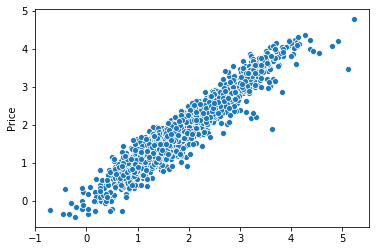

<Figure size 1080x360 with 0 Axes>

In [181]:
sns.scatterplot(x = y1_pred, y = y_test_dummy)
plt.figure(figsize=(15, 5))
plt.show()

### A.2 With dummy and label encoded data.

In [143]:
#log transforming the target variable.
usedcars_X_dummy_lbl = usedcars_dummy_lbl.drop(["Price"], axis = 1)
usedcars_y_dummy_lbl = np.log(usedcars_dummy_lbl["Price"])

In [144]:
X_train_dummy_lbl, X_test_dummy_lbl, y_train_dummy_lbl, y_test_dummy_lbl = train_test_split(usedcars_X_dummy_lbl, usedcars_y_dummy_lbl,
                                                                            test_size=0.3,random_state=100)

In [145]:
r2 = cross_val_score(lm, X_train_dummy_lbl, y_train_dummy_lbl, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.8940951959401954


In [148]:
model2 = lm.fit(X_train_dummy_lbl, y_train_dummy_lbl)
y2_pred= model2.predict(X_test_dummy_lbl)

print("Testing set: ",model2.score(X_test_dummy_lbl,y_test_dummy_lbl))

Testing set:  0.9027168760908013


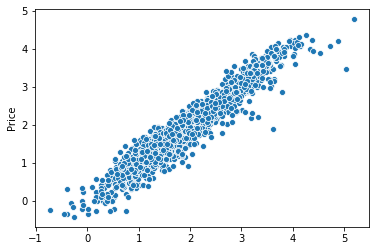

<Figure size 1080x360 with 0 Axes>

In [182]:
sns.scatterplot(x = y2_pred, y = y_test_dummy_lbl)
plt.figure(figsize=(15, 5))
plt.show()

### A.3 With label encoded categorical data

In [149]:
#log transforming the target variable.
usedcars_X_lbl = usedcars_lbl.drop(["Price"], axis = 1)
usedcars_y_lbl = np.log(usedcars_lbl["Price"])

In [150]:
X_train_lbl, X_test_lbl, y_train_lbl, y_test_lbl = train_test_split(usedcars_X_lbl, usedcars_y_lbl,
                                                                            test_size=0.3,random_state=100)

In [151]:
r2 = cross_val_score(lm, X_train_lbl, y_train_lbl, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.893162239230086


In [152]:
model3 = lm.fit(X_train_lbl, y_train_lbl)
y1_pred= model3.predict(X_test_lbl)

print("Testing set: ",model3.score(X_test_lbl,y_test_lbl))

Testing set:  0.9016261333072947


<hr>

<hr>

## B. KNN Model

As the scales of indeendent variables is different the data should be standardised. Ass it makes no sense in standardising the dummy variables we will be using the data in which label encoding is used.

In [156]:
scaler = StandardScaler()

In [163]:
scaler.fit(usedcars_lbl[['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type','Mileage', 
                             'Engine', 'Power', 'Seats', 'Price', 'Company_Name','Model_Age']])

usedcars_lbl_std = scaler.transform(usedcars_lbl[['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
                                                    'Mileage','Engine', 'Power', 'Seats', 'Price', 'Company_Name',
                                                    'Model_Age']])

In [164]:
usedcars_lbl_std = pd.DataFrame(usedcars_lbl_std, columns = ['Kilometers_Driven', 'Fuel_Type', 'Transmission', 
                                                                 'Owner_Type','Mileage','Engine', 'Power', 'Seats', 
                                                                 'Price', 'Company_Name','Model_Age'])

In [168]:
#log transforming the target variable.
usedcars_X_lbl_std = usedcars_lbl_std.drop(["Price"], axis = 1)
usedcars_y_lbl_std = usedcars_lbl_std["Price"]

In [169]:
X_train_lbl_std, X_test_lbl_std, y_train_lbl_std, y_test_lbl_std = train_test_split(usedcars_X_lbl_std, usedcars_y_lbl_std,
                                                                            test_size=0.3,random_state=100)

In [170]:
for k in range(7):
    k = k+1
    knm = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    r2 = cross_val_score(knm, X_train_lbl_std, y_train_lbl_std, cv = 10).mean()
    print("Training Set: ",r2)
    
    model4 = knm.fit(X_train_lbl_std, y_train_lbl_std)
    y4_pred = model4.predict(X_test_lbl_std)
    print("Testing set_r2: ",k, "is: ", model4.score(X_test_lbl_std,y_test_lbl_std))

Training Set:  0.7951130110280178
Testing set_r2:  1 is:  0.8547939984330136
Training Set:  0.8285769799633217
Testing set_r2:  2 is:  0.8706969756174798
Training Set:  0.8423830317930392
Testing set_r2:  3 is:  0.886112064507698
Training Set:  0.8484776633231933
Testing set_r2:  4 is:  0.89396431286962
Training Set:  0.8523405767738623
Testing set_r2:  5 is:  0.8877655451276744
Training Set:  0.8499127630259163
Testing set_r2:  6 is:  0.8859492537559738
Training Set:  0.8504579789211896
Testing set_r2:  7 is:  0.8832383399651501


<hr>

<hr>

## C. Decision Tree

In [171]:
dtr = DecisionTreeRegressor()

In [138]:
#log transforming the target variable.
usedcars_X = usedcars.drop(["Price"], axis = 1)
usedcars_y = usedcars["Price"]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(usedcars_X, usedcars_y, test_size=0.3,random_state=100)

In [172]:
r2 = cross_val_score(dtr, X_train, y_train, cv=10).mean()
print("Training Set: ",r2)

Training Set:  0.7882199007461482


In [173]:
model5 = dtr.fit(X_train, y_train)
y5_pred= model5.predict(X_test)

print("Testing set: ",model5.score(X_test,y_test))

Testing set:  0.8545505521677019


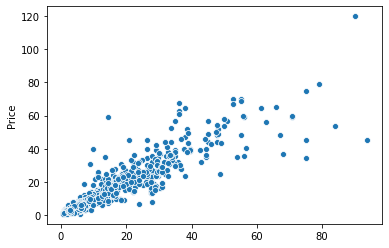

<Figure size 1080x360 with 0 Axes>

In [183]:
sns.scatterplot(x = y5_pred, y = y_test)
plt.figure(figsize=(15, 5))
plt.show()

In [174]:
baggedmodel = ensemble.BaggingRegressor(base_estimator = dtr, n_estimators=50, oob_score = True)

In [175]:
model5 = baggedmodel.fit(X_train,y_train)

In [176]:
model5.oob_score_

0.8633814360311381

In [177]:
baggedmodel.score(X_test,y_test)

0.8980504148496959

In [190]:
pred = baggedmodel.predict(X_test)

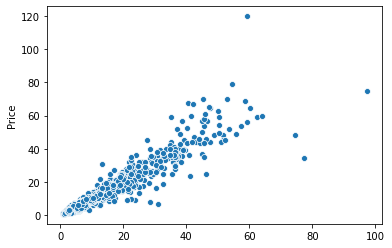

<Figure size 1080x360 with 0 Axes>

In [191]:
sns.scatterplot(x = pred, y = y_test)
plt.figure(figsize=(15, 5))
plt.show()